In [11]:
!python -m pip install multiple-hypothesis-testing

In [12]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [13]:
from Higher_Criticism import *
from Higher_Analysis import Monte_carlo_Confusion_Matrices
from Synthetic_Data_Generators import Multi_Class_Normal_Population as Data_Generator
from Synthetic_Data_Generators import Two_Lists_Tuple


In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'


In [15]:
N = 1000
monte_carlo = 1000
chunk_size = 100
epsilon = 0.05
tau_range = list(np.linspace(1,3,20))



In [16]:
params_list = Data_Generator.params_dicts_from_lists_N_mu_fraction(N_range=[N], mu_range=tau_range, fraction_range=[epsilon])
signal_generators = [Data_Generator(**params) for params in params_list]
hc_models = [Higher_Criticism(gamma=0.1, plot_color='black'),\
            Benjamini_Hochberg(alpha=0.5, plot_color='blue'),\
            Benjamini_Hochberg(alpha=0.1, plot_color='red'),\
            Bonferroni(alpha=1.0, plot_color='green'),\
            Higher_Criticism(gamma=-0.5, plot_color='orange')]


In [17]:

confusion_matrices = Monte_carlo_Confusion_Matrices(\
    hc_models=hc_models, signal_generators=signal_generators,\
    monte_carlo=monte_carlo, chunk_size=chunk_size)


100%|██████████| 10/10 [00:05<00:00,  1.78it/s]


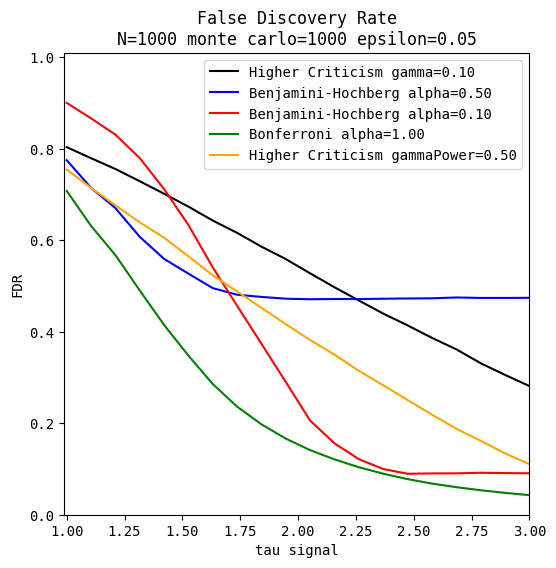

In [18]:
fdr_all = confusion_matrices.apply_mean_false_disovery_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'False Discovery Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, fdr_all[ind_model], label=hc_model.full_name(), color=hc_model.plot_color)
max_tau = np.max(tau_range)
ax.set_xlabel('tau signal')
ax.set_ylabel('FDR')
ax.set_ylim(top=1.01, bottom=0)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()



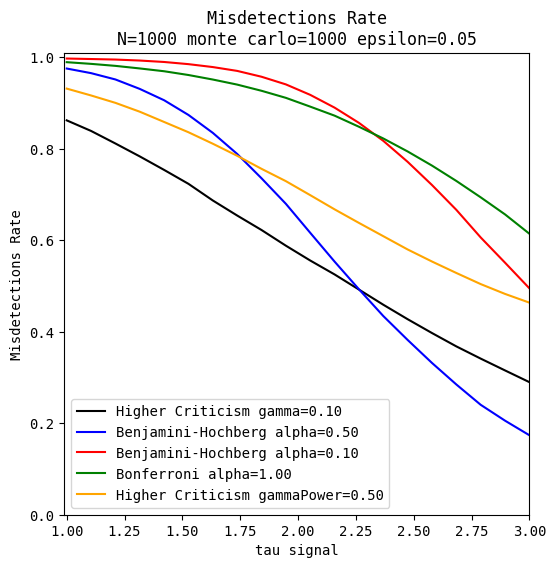

In [19]:
mdr_all = confusion_matrices.apply_mean_misdetection_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Misdetections Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, mdr_all[ind_model], label=hc_model.full_name(), color=hc_model.plot_color)
ax.set_xlabel('tau signal')
ax.set_ylabel('Misdetections Rate')
ax.set_ylim(top=1.01, bottom=0)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()



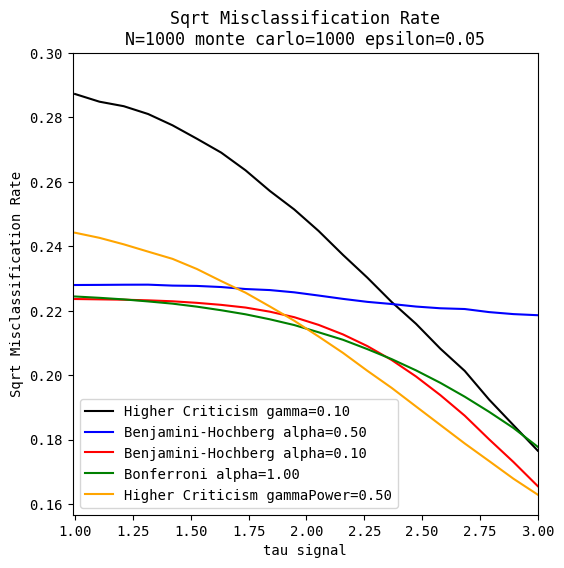

In [20]:
mcr_all = confusion_matrices.apply_sqrt_mean_misclassification_rate()
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title(f'Sqrt Misclassification Rate\nN={N} monte carlo={monte_carlo} epsilon={epsilon:.2f}')
for ind_model, hc_model in enumerate(hc_models):
    ax.plot(tau_range, mcr_all[ind_model], label=hc_model.full_name(), color=hc_model.plot_color)
ax.set_xlabel('tau signal')
ax.set_ylabel('Sqrt Misclassification Rate')
ax.set_ylim(top=0.3)
ax.set_xlim(left=0.99, right=np.max(tau_range))
ax.legend()
plt.show()

